In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

        self.bfinal = nn.Parameter(torch.tensor(-16),requires_grad=False)
    
    def forward(self,input):
        input_to_relu1 = input*self.w00 + self.b00
        relu1_out = F.relu(input_to_relu1)
        scaled_relu1_out = relu1_out*self.w01

        input_to_relu2 = input*self.w10 + self.b10
        relu2_out = F.relu(input_to_relu2)
        scaled_relu2_out = relu2_out*self.w11

        input_to_final_relu = scaled_relu1_out + scaled_relu2_out + self.bfinal

        output = F.relu(input_to_final_relu)
        return output

In [12]:
input_ = torch.linspace(0,1,11)

In [13]:
model = BasicNN()
output_val = model(input_)


In [15]:
output_val

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

<Axes: >

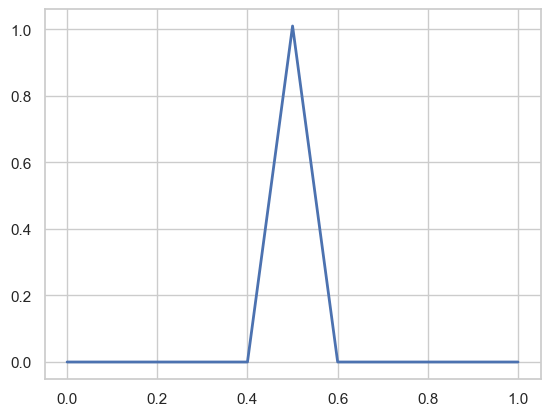

In [16]:
sns.set(style="whitegrid")
sns.lineplot(x=input_,y=output_val,
            linewidth=2)
